# Homework #2
**Due:** Thursday January 18th, 11:59PM via Blackboard

**Name:** **Anish Doshi**,  **Student Id:** **ap2326**

## Problem 1. Learning Bridges with Mininet (20 pts)
You will need a running Mininet VM for this problem. See [working with the Mininet VM](http://www.grotto-networking.com/SDNfun.html#working-with-the-mininet-vm) for configuration tips.

**(a)** Mininet is Python based. In fact you can control all aspects of Mininet from Python.  From a terminal to your Mininet VM use the command `sudo python`. This brings up the Python interpreter as *superuser* which is needed since Mininet creates network interfaces and such in the VM. At the Python command line enter the code below to create, run, and test a very simple network:

```python
from mininet.net import Mininet
from mininet.topo import Topo
topo = Topo()  # Create an empty topology
topo.addSwitch("s1")  # Add switches and hosts to the topology
topo.addHost("h1")
topo.addHost("h2")
topo.addLink("h1", "s1") # Wire the switches and hosts together with links
topo.addLink("h2", "s1")
net = Mininet(topo)  # Create the Mininet, start it and try some stuff
net.start()
net.pingAll()
net.iperf()
net.stop()
```

Capture a screen shot of your work. Note that *iperf* performance numbers.  I got something like ![Mininet test1](HW2Mini1.png)

**(b)** Enter the following code into the Python interpreter (`sudo python`) running on your Mininet VM. Does the a *ping* test between hosts work for you? Why or why not? Note that the default controller for the switches in Mininet implements an Ethernet learning bridge but does not support the spanning tree protocol.

```python
from mininet.net import Mininet
from mininet.topo import Topo
from mininet.link import TCLink  # So we can rate limit links
from mininet.cli import CLI  # So we can bring up the Mininet CLI
topo = Topo()  # Create an empty topology
topo.addSwitch("s1")  # Add switches and hosts to the topology
topo.addSwitch("s2")
topo.addSwitch("s3")
topo.addHost("h1")
topo.addHost("h2")
topo.addHost("h3")
# Wire the switches and hosts together. Note there is a loop!
topo.addLink("h1", "s1", bw=20.0, delay='10ms', use_htb=True)
topo.addLink("h2", "s2", bw=25.0, delay='10ms', use_htb=True)
topo.addLink("h3", "s3", bw=25.0, delay='10ms', use_htb=True)
topo.addLink("s1", "s2", bw=11.0, delay='40ms', use_htb=True)
topo.addLink("s1", "s3", bw=15.0, delay='7ms', use_htb=True)
topo.addLink("s2", "s3", bw=5.0, delay='7ms', use_htb=True)
net = Mininet(topo=topo, link=TCLink)
net.start()
CLI(net)  # Bring up the mininet CLI
net.stop()
```

Take a screen shot, I got something like ![Mininet test 2](HW2Mini2.png)



A.1a. Following is the screenshot for simple python code in mininet: The *iperf* results for TCP bandwidth between h1 & h2 is 43.8Gb/s 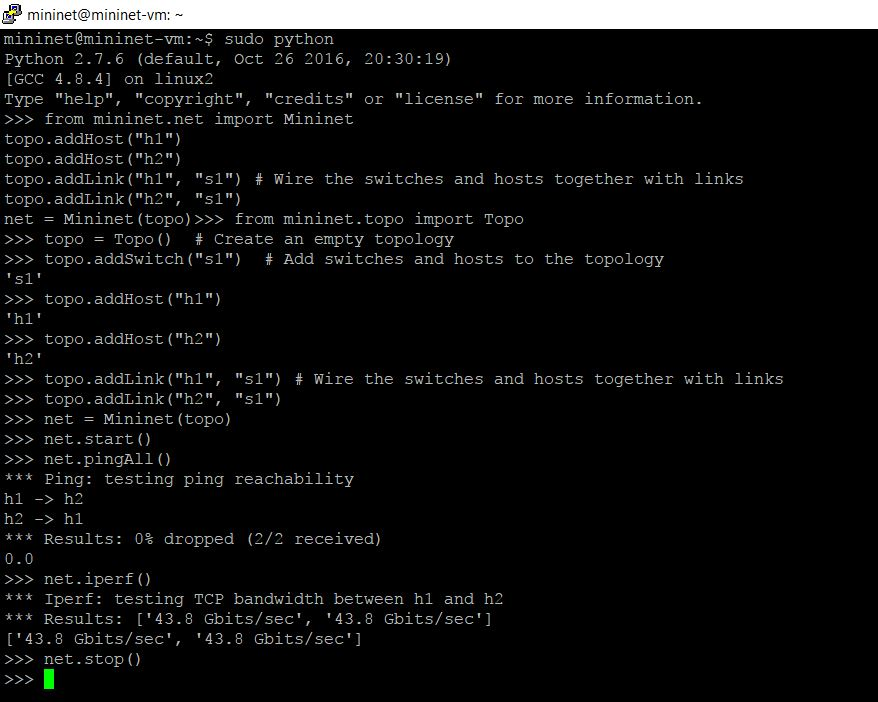

A.1b. The ping test between the hosts does not work because default controller for the switches in mininet does not support spanning tree protocol. As a result, loop free local topology for ethernet networks can not be established. Since there is a loop and because of the controller, the ping test fails. 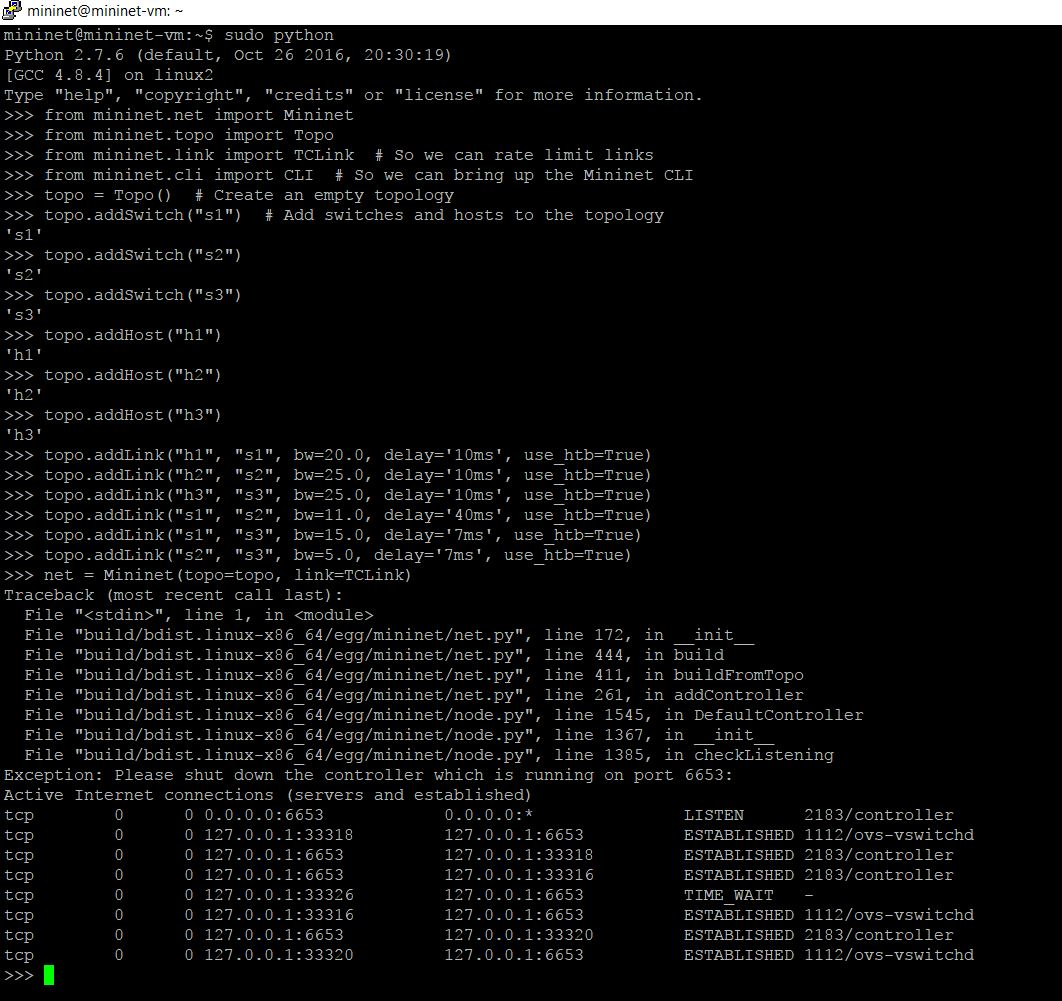

## Problem 2. Tunnels and such (20 pts)

**(a)** Explain how a *ping* (ICMP echo request/response) get through a "NAT" box. Cite any web pages or references that you use.

**(b)** Suppose you are using *GRE* to extend an *Ethernet* network between two sites over the Internet. Draw a rough packet diagram that show the protocol nesting (packets within packets) of an example tunnel packet that would be seen on the internet.  What kind of information would the tunnel end points (TE1 and TE2) need to keep to make this work? ![tunnel](Net2NetTunnel.png). 


A.2a. ICMP has no port number like TCP/UDP which is used to keep track of the sessions (multiplexing). In RFC792, the identifier and sequence number may be used by the echo sender to aid in matching the replies with the echo requests. For example, the identifier might be used like a port in TCP or UDP to identify a session, and the sequence number might be incremented on each echo request sent. The echoe returns these same values in the echo reply. Forwarding of the ICMP through NAT is also dependent on several other factors such as order in which router receive the fragments, state of the translation table at that time.

Refrences:
https://www.cisco.com/c/en/us/support/docs/ip/network-address-translation-nat/13771-10.html;
https://learningnetwork.cisco.com/thread/57646;

A.2b. Rough packet diagram explaining GRE to extend an ethernet over Internet is as shown below: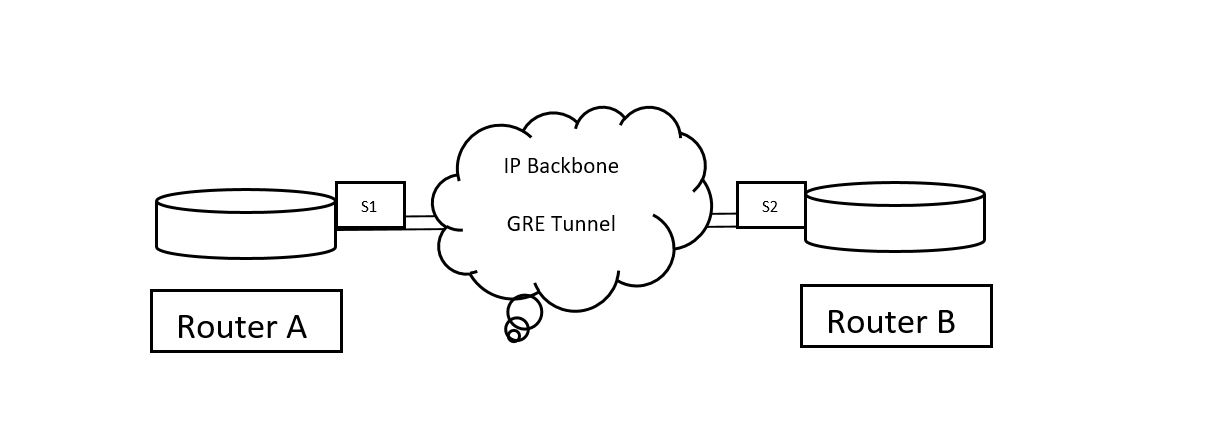 The tunnel endpoints TE1,TE2 should have information like checksum bit, GRE header, payload, protocol type field.

## Problem 3. Paths and Trees and Network Creation (20 pts)
**(a)** How many different trees does a linear network (A<-->B<-->C...) consisting of N > 2 nodes have?

**(b)** How many different trees does a ring network consisting of N > 3 nodes have?

**(c)** How many different paths are between two nodes in tree network? Why?

**(d)** Using the [ComNetViz](https://www.grotto-networking.com/ComNetViz/ComNetViz.html) web app create a network with at least 15 switches, but no hosts.  Use **your initials** as the start of the switch names, i.e., for me *GB1, GB2,...*.  Make sure that the switches are connected with lots of links to be able to withstand switch and link failures and to support alternative paths.  When you first create the links you can use any *weight* and *capacity* you wish. After you've finished adding nodes and links to the network use the "Net/Distance Based Weights" menu item to assign weights to all the links. Use the "Net/Randomize Capacities" menu item to assign random capacities to the links between **10 and 200** units. Under the "View" menu item make sure the "Show link capacity" item is checked so that the graphical thickness of the links is related to the links capacity. Export the network into a JSON file (which you will use in the next problem) and include a screen shot of your network here, e.g., 
![Dr. B's example network](HW2ExampleNet.png)

A.3a. Total number of trees with 'n' nodes in a linear network is n^n-2

A.3b. If its a ring network, all nodes has to be connected with each other, thus forming a loop. which is contradictory to the defination of a tree. Hence if it is a ring network, it can not form a tree. 

A.3c. A tree is undirected graph, where two nodes can can be connected by exactly 1 path.

A.3d. Following is the network with 17 switches. 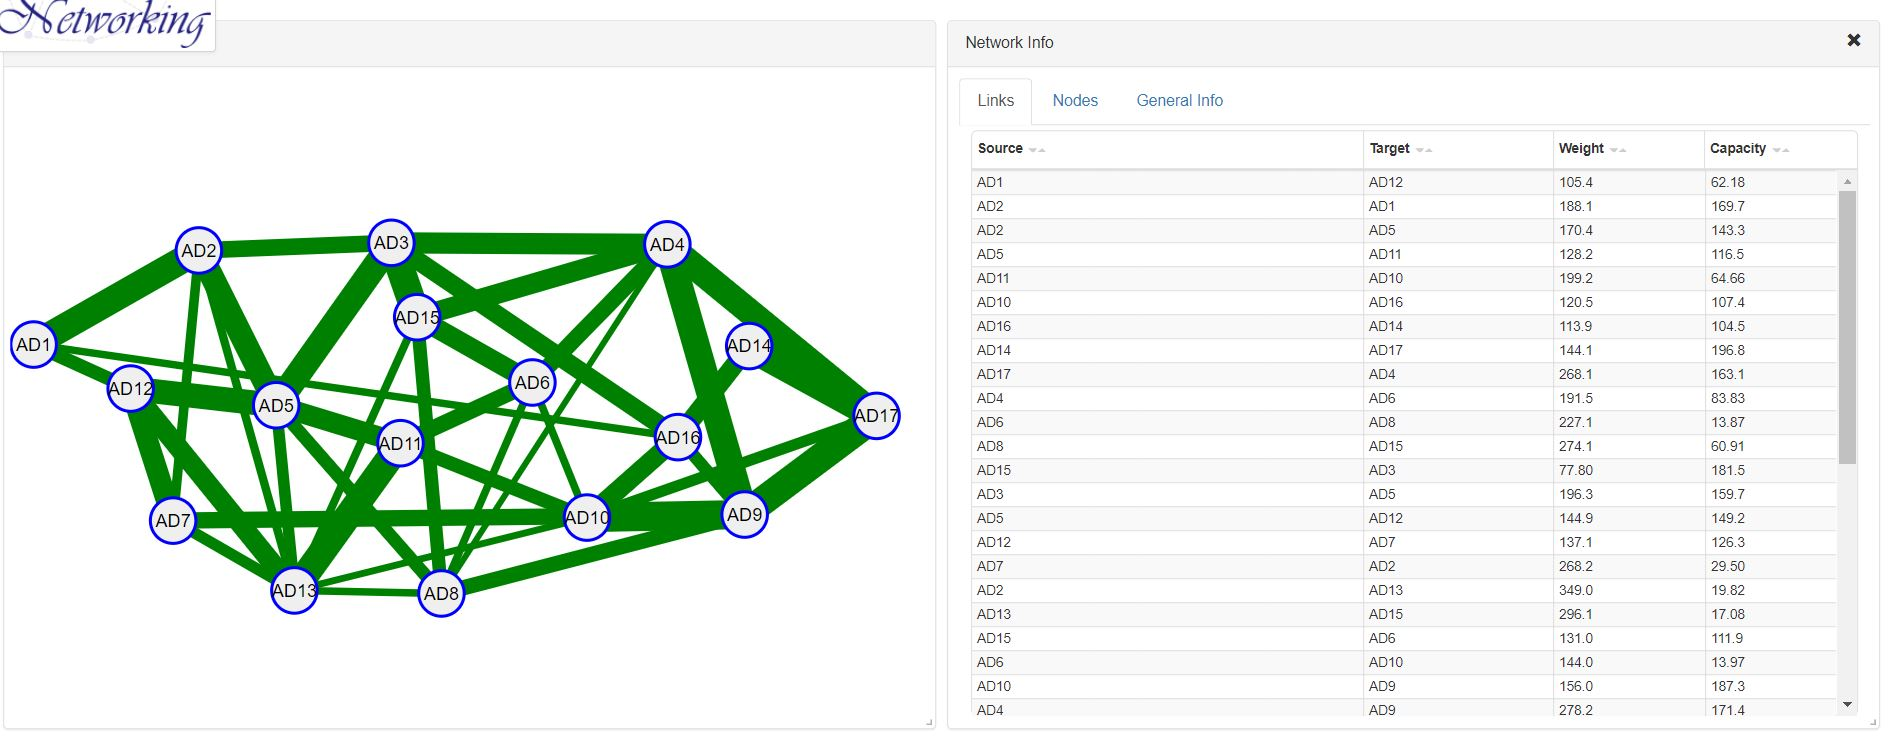

## Problem 4 Shortest Paths, Widest Paths, and Spanning Trees (20 pts)
**(a)** In your network from problem 3(d) choose any node and compute all the shortest paths to that node. Use the "Path/Shortest Paths" menu item with your chosen path as the *source* and "all" as the destination, click "compute", then click "apply". Click on "Path/Paths Info" to bring up the "Paths Info" panel which allows you to add/remove and visualize paths. Click the "All Paths" tab and select all the shortest paths that you just computed.  Do these paths form a tree?  Include a screen shot of your network with the paths highlighted and the paths panel, e.g., ![Shortest paths from A4](HW2PathsShort1.png)

**(b)** In your network from problem 3(d) choose a different node from part (a) and compute all the shortest paths from that node. Do these paths form a tree?  Are these paths the same as in part (a)? Highlight all the paths and capture a screen shot, e.g., ![Shortest paths from C12](HW2PathsShort2.png)

**(c)** In these bandwidth hungry times we might be interested in the "widest paths" (in terms of capacity) from a node.  What limits the capacity of a path? Choose any node from your network then compute the widest paths from that node ("Path/Widest Paths"). Highlight all of these paths. Do these paths for a tree? Is this set of paths the same as in parts (a) or (b)? Capture a screen shot, e.g., ![Widest paths from B4](HW2PathsWide.png).

**(d)** Compute the Minimum spaning tree ("Path/Minimum Spanning Tree"). The app returns all the links of the tree each considered a "path". Is the collection of paths induced by this tree the same as any of those in parts (a)-(c)? Capture a screen shot, e.g., ![Min span tree](HW2PathsMSP.png)

**(e)** How many different trees does your network contain?  Hint see [Kirchhoff's Theorem](https://en.wikipedia.org/wiki/Kirchhoff's_theorem). See below for an example of how I calculated this for my example network.

In [1]:
# How I computed the number of trees in my network
from networkx.readwrite import json_graph
import networkx as nx
import json
import trees  # imports Dr. B's tree computation module.

# Read in a JSON formatted graph file, put your file name in here not mine!
gnl = json.load(open("HW2Prob3Ex.json"))
g = json_graph.node_link_graph(gnl)
# Basic node and link info
print("Network nodes: {}".format(g.nodes()))
# print("Network links: {}".format(g.edges()))
# Compute number of trees
num_trees = trees.exact_num_trees(g)
print("The number of trees in this graph is {}".format(num_trees))

Network nodes: ['B9', 'A17', 'B3', 'C12', 'E20', 'D6', 'B22', 'D30', 'B16', 'D20', 'B28', 'A28', 'E5', 'C17', 'D14', 'E17', 'C29', 'E8', 'A23', 'E28', 'E15', 'A4', 'D16', 'D4', 'A14', 'A9', 'C8', 'B4', 'C6', 'C24']
The number of trees in this graph is 4747921703663.972


A.4a. In the following network with 17 switches, red paths shows the shortest path from AD11 to all other nodes. Yes, this network does form a tree. Please refer the following screenshot for the same: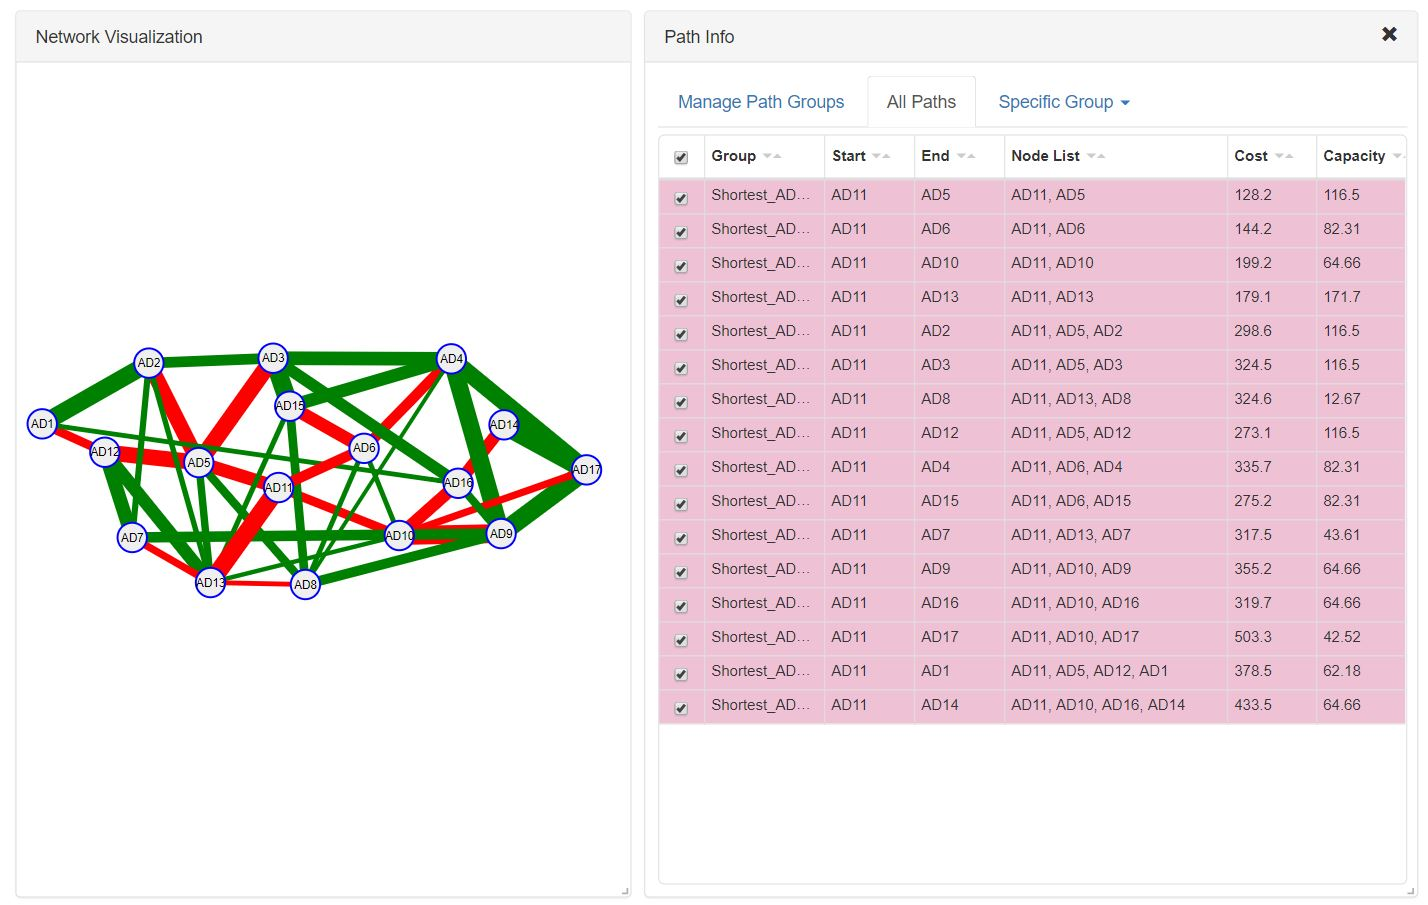

A.4b. In the following network with 17 switches, red paths shows the shortest path from AD8 to all other nodes. Yes, this network does form a tree. No, the paths in 4a and 4b are different. Please refer the following screenshot for the same: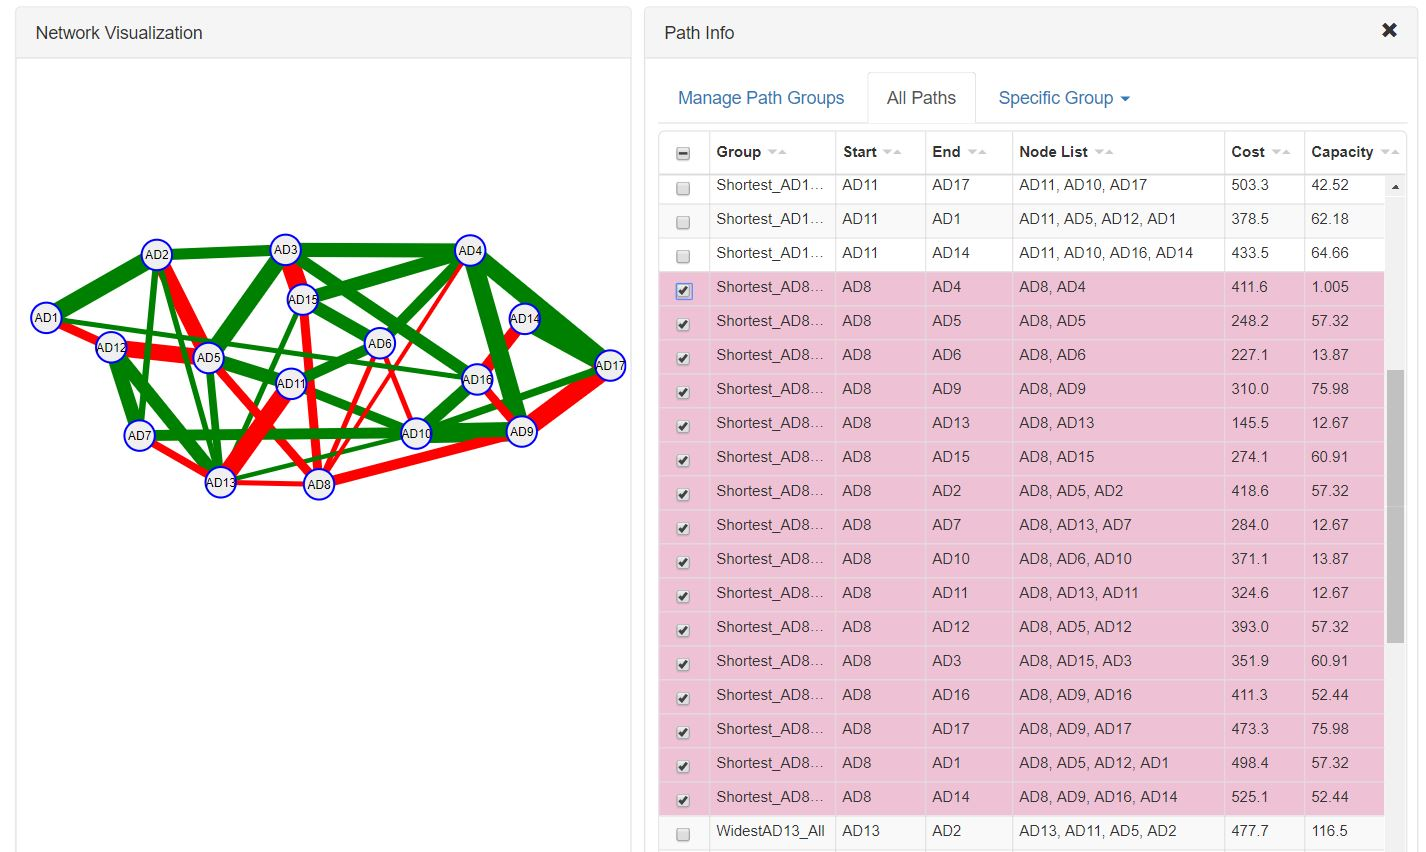

A.4c.In the following network with 17 switches, red paths shows the widest path from AD13.It is the bandwidth that limits the capacity of path. Yes, this network does form a tree. No, the paths in 4a and 4b are different from this one. Please refer the following screenshot for the same: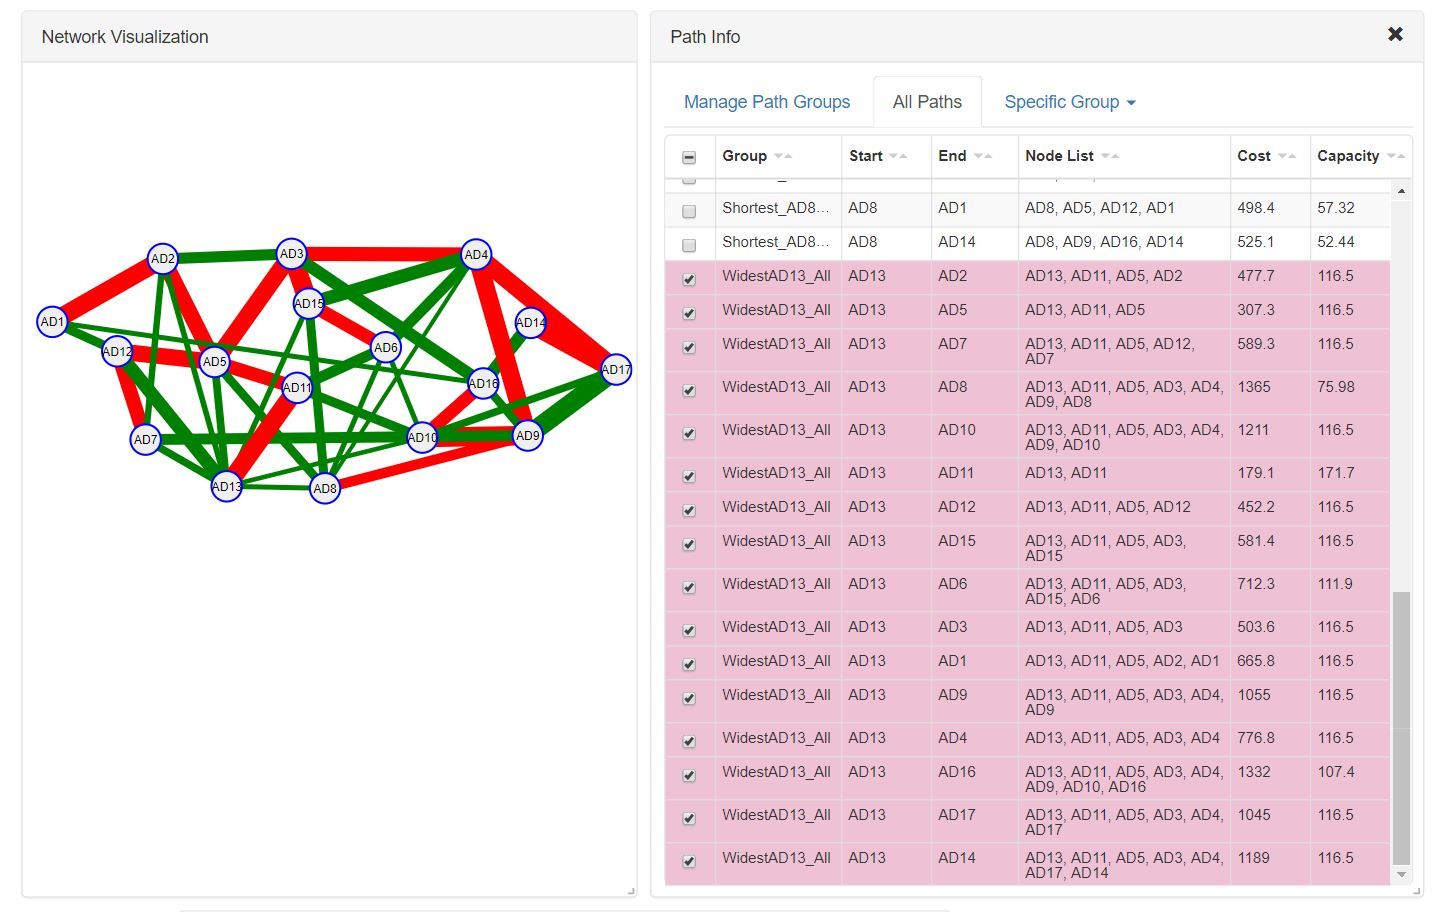

A.4d. The minimum spanning tree for the network with 17 switches is as shown below. No, the paths shown are not same with respective to any of the above in part 4a-4c.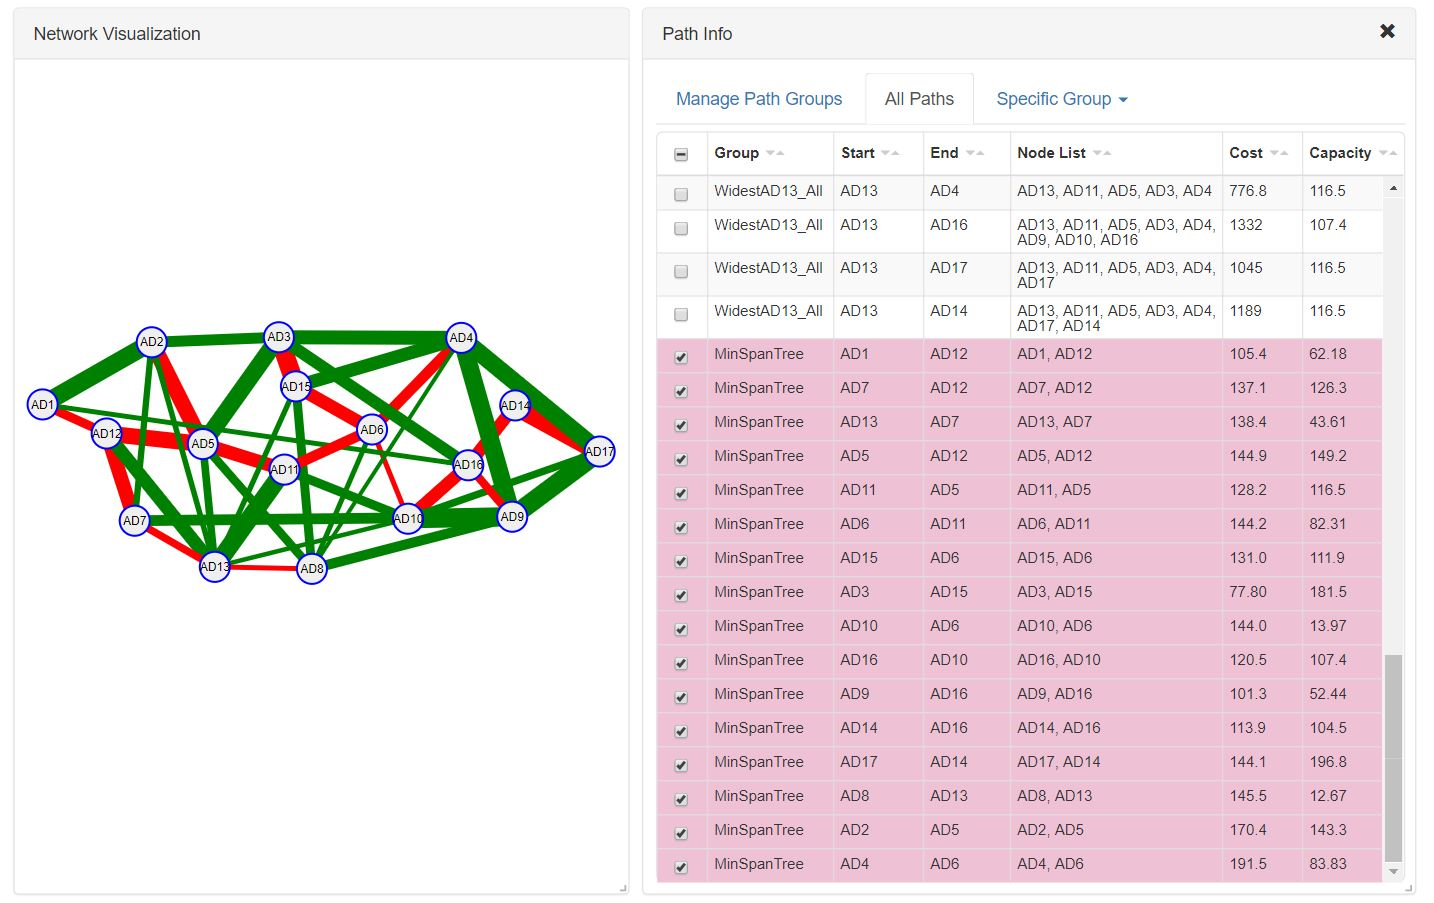  

A.4e. The number of trees the nework design contain is as shown below:

In [2]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import trees  # imports Dr. B's tree computation module.

# Read in a JSON formatted graph file, put your file name in here not mine!
gnl = json.load(open("nwdesign.json"))
g = json_graph.node_link_graph(gnl)
# Basic node and link info
print("Network nodes: {}".format(g.nodes()))
# print("Network links: {}".format(g.edges()))
# Compute number of trees
num_trees = trees.exact_num_trees(g)
print("The number of trees in this graph is {}".format(num_trees))

Network nodes: ['AD1', 'AD2', 'AD3', 'AD4', 'AD5', 'AD6', 'AD7', 'AD8', 'AD9', 'AD10', 'AD11', 'AD12', 'AD13', 'AD14', 'AD15', 'AD16', 'AD17']
The number of trees in this graph is 2510659886.9999924


## Problem 5 Ethernet VLANs and Multiple Spanning Trees (20 pts)
Suppose that you work for an animation company with 24 employees divided into three teams working on different films.  Since each team member is involved with intensive computing and networking they each have a *wired* workstation with a 10Gbp Ethernet link. Your job will be to assign machines to VLANs based on films and associated VLANs with different spanning trees in a better than random manner.
**(a)** Using ComNetViz create an example company network consists of 5 switches each with (up to 8) 10Gbps links to hosts and (up to three) 100Gbps links between switches. Make sure that each switch is connected to two to three other switches (but no more) for reliability purposes.  Label the hosts for team 1 as H11, H12,...H16, for team 2 H21, H22, ..., H26, and similarly for team three. Randomly assign hosts to switches making sure not to exceed twelve hosts per any one switch. Make when creating hosts that you assign them a VID (VLAN Id).  A smaller example network that I created looks like ![Simple VLAN Net](HW2VLANEx.png)

**(b)** How many trees does your VLAN network support?

**(c)** In **general** is assigning VLANs to trees to optimize bandwidth to individual teams a hard problem? Why?
**(d)** Come up with a reasonable assignment of VLANs to trees. Show me some graphical depiction of the trees. For example below I tried an algorithm where I kept only the members of each VLAN and computed the minimum spanning tree in each case. Did this approach work lead to better use of the inter-switch links? ![VLAN1](HW2VLAN1.png), ![VLAN2](HW2VLAN2.png), ![VLAN3](HW2VLAN3.png), 

In [2]:
# Read in a JSON formatted graph file, put your file name in here not mine!
gnl = json.load(open("DrBVLANEx18.json"))
g = json_graph.node_link_graph(gnl)
# Compute number of trees
num_trees = trees.exact_num_trees(g)
print("The number of trees in this graph is {}".format(num_trees))

The number of trees in this graph is 24.000000000000014


A.5a. Following is the company work with 6 switches, 24 hosts divided into 3 different groups. Each switch has total capacity of 100 with other switches and a total capacity of 10 with its hosts.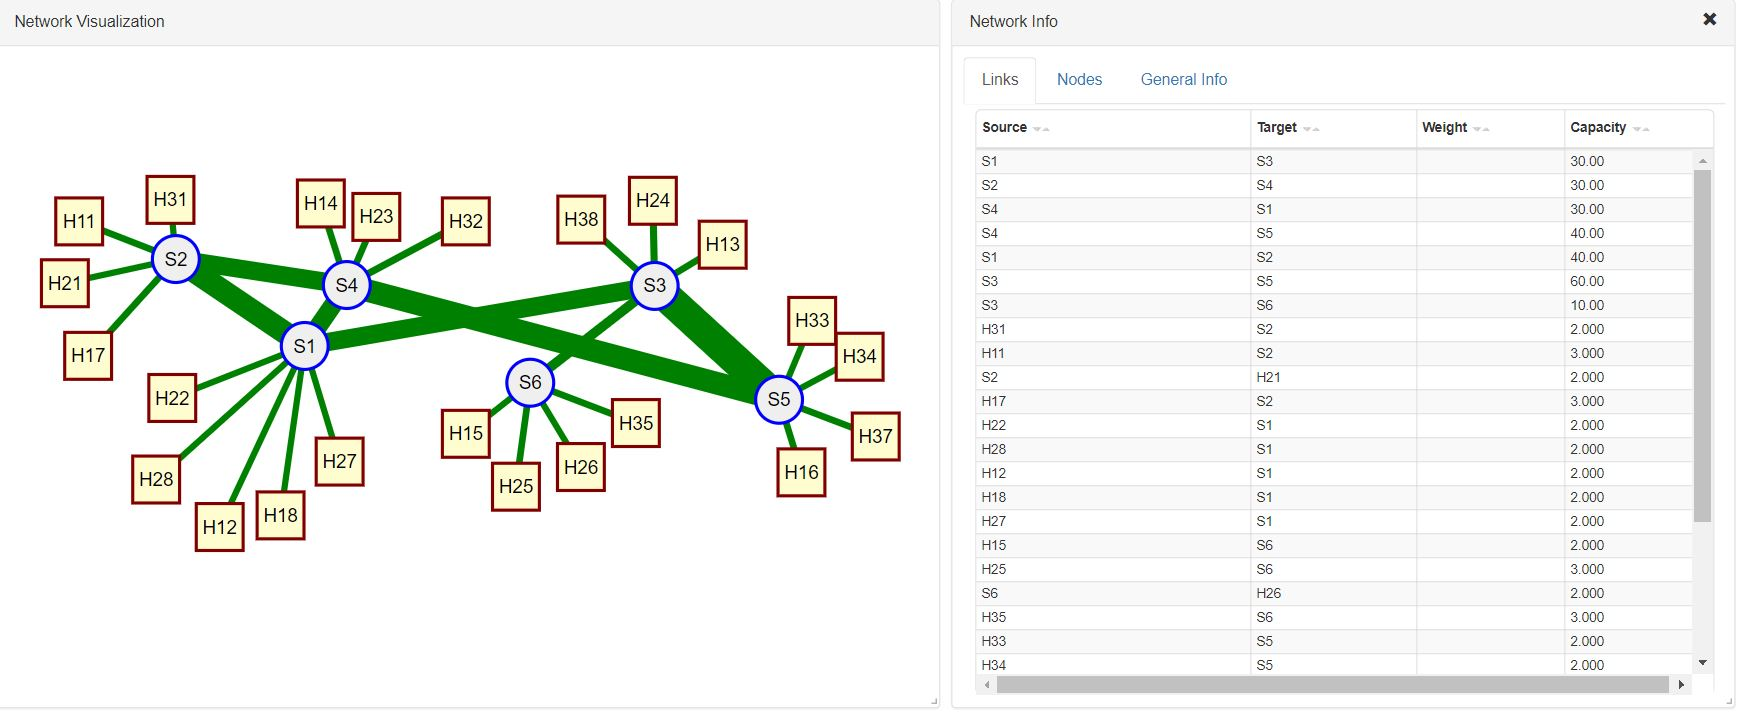

A.5b. Since the network is disconnected there is no tree in the virtual network.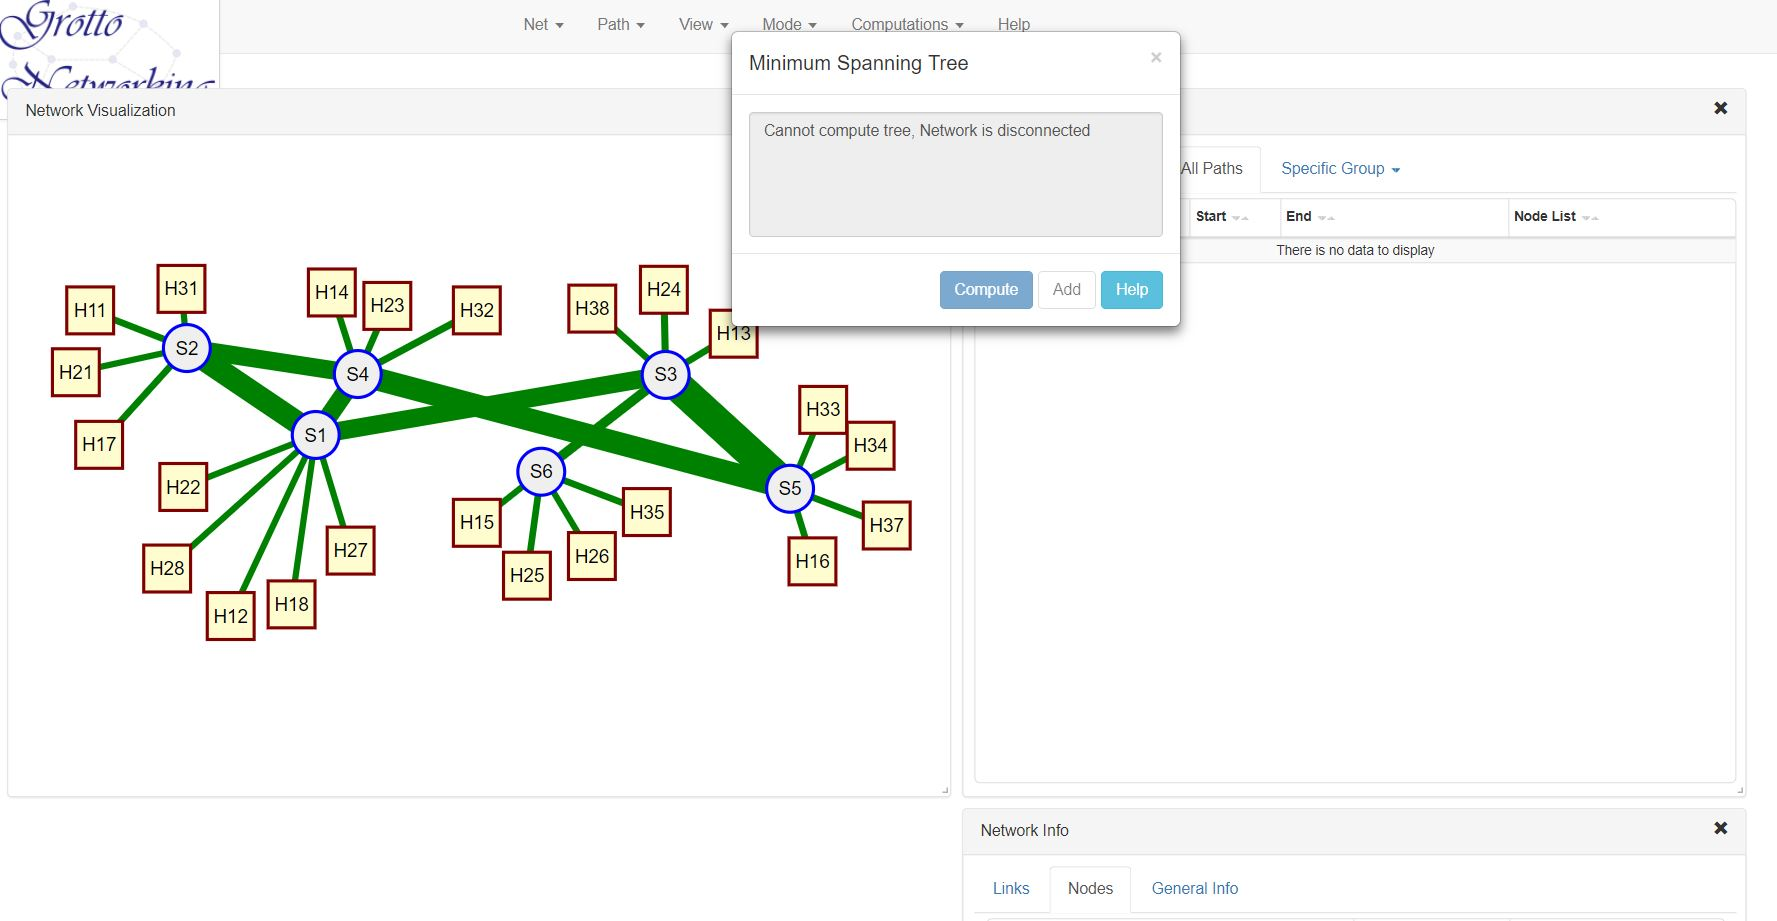

In [1]:
# Read in a JSON formatted graph file, put your file name in here not mine!
gnl = json.load(open("5d.json"))
g = json_graph.node_link_graph(gnl)
# Compute number of trees
num_trees = trees.exact_num_trees(g)
print("The number of trees in this graph is {}".format(num_trees))

NameError: name 'json' is not defined

I completed the network design twice. For the first time, during the minimum spanning tree computation, the webpage was unresponsive, so I had to exit hence I lost my design. I recreated the design and got this issue that cannot compute tree, network disconnected. 